In [2]:
!pip install gymnasium

In [3]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import numpy as np

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]], dtype=uint8)
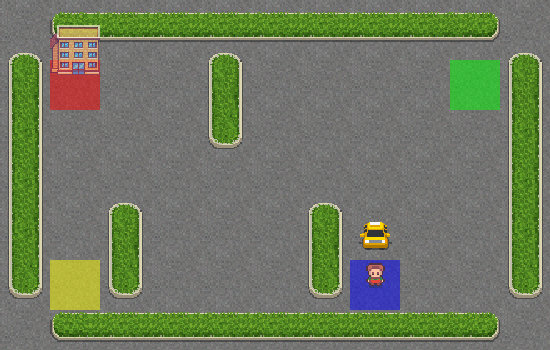

In [4]:
#Setting up environment
env = gym.make("Taxi-v3", render_mode="rgb_array" , max_episode_steps=200)
env.reset()
env.render()


In [5]:
#Initialising Q_table
q_table = np.zeros((500,6))# 500 --> total states  , 6 --> No. of actions

In [41]:
max_episode_steps_len = 200
episodes = 1000
lr = 1e-1
gamma = 0.99
epsilon = 0.09
epsilon_decay = 0.99
epsilon_min = 0.05

total_reward_per_episode = []
#Training Loop
for episode in range(episodes):
  total_reward = 0
  state, _ = env.reset()
  for step in range(max_episode_steps_len):

    action = q_table[state].argmax(-1 )

    if np.random.rand(1) < epsilon : # Takes Random Action mostly  at first and gradually dereases it
      action = np.random.randint(q_table.shape[1])


    new_s , r , terminated , truncated , info  = env.step(action)
    q_table[state ,action ] = q_table[state , action]  + lr * (r + gamma* q_table[new_s].max( -1) -  q_table[state , action])  #Updates Q_table



    total_reward += r # Increments  total reward count
    state = new_s


   # print(epsilon)

    if terminated  or truncated:
      print(f"{ 'Truncated' if truncated else  'Terminated'}")

      break



  # epsilon_min = 0.5 if episode / episodes <= 0.5 else 0.05 # Making sure that the agent also explores the environment till half of the episodes are done.
  epsilon = max(epsilon_min , epsilon * epsilon_decay)
  print(f"Q_table updated  \n Total reward in episode {episode} is {total_reward}  and the epsilon is {epsilon}")

  total_reward_per_episode.append(total_reward) # Keeps stat of total reward in every episode
  #break

print('Training Finished')




Terminated
Q_table updated  
 Total reward in episode 0 is 10  and the epsilon is 0.0891
Terminated
Q_table updated  
 Total reward in episode 1 is 9  and the epsilon is 0.088209
Terminated
Q_table updated  
 Total reward in episode 2 is 8  and the epsilon is 0.08732691
Terminated
Q_table updated  
 Total reward in episode 3 is -2  and the epsilon is 0.08645364089999999
Terminated
Q_table updated  
 Total reward in episode 4 is -15  and the epsilon is 0.08558910449099999
Terminated
Q_table updated  
 Total reward in episode 5 is 10  and the epsilon is 0.08473321344608999
Terminated
Q_table updated  
 Total reward in episode 6 is 4  and the epsilon is 0.08388588131162908
Terminated
Q_table updated  
 Total reward in episode 7 is 3  and the epsilon is 0.08304702249851278
Terminated
Q_table updated  
 Total reward in episode 8 is 0  and the epsilon is 0.08221655227352766
Terminated
Q_table updated  
 Total reward in episode 9 is -1  and the epsilon is 0.08139438675079239
Terminated
Q_tabl

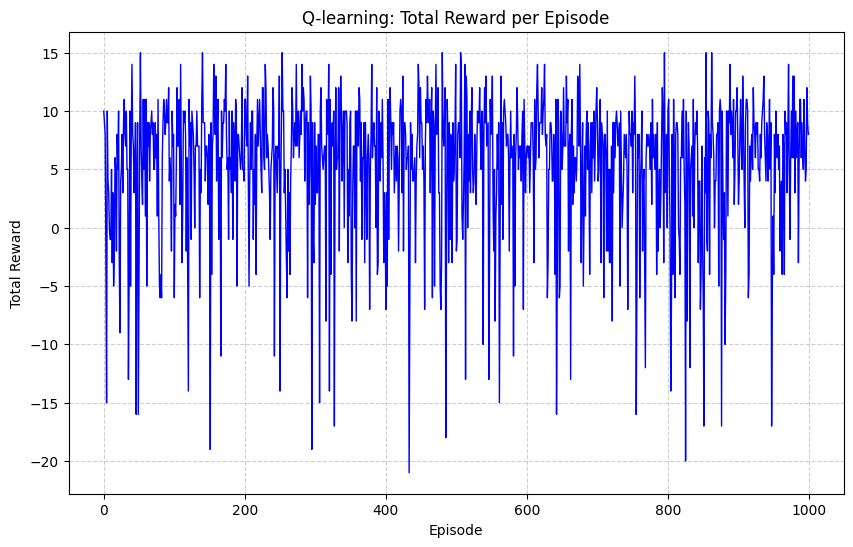

In [44]:
import matplotlib.pyplot as plt

# Plot total reward per episode
plt.figure(figsize=(10,6))
plt.plot(total_reward_per_episode, color='blue', linewidth=1)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-learning: Total Reward per Episode")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [50]:
# Evaluation phase (greedy policy)
test_episodes = 100
test_rewards = []

for ep in range(test_episodes):
    state, _ = env.reset()
    total_reward = 0
    terminated, truncated = False, False

    while not (terminated or truncated):
        action = q_table[state].argmax()  # purely greedy
        state, r, terminated, truncated, info = env.step(action)
        total_reward += r

    test_rewards.append(total_reward)

print(f"Average reward over {test_episodes} greedy episodes: {np.mean(test_rewards):.2f}")
print(f"Best episode reward: {np.max(test_rewards)}")
print(f"Worst episode reward: {np.min(test_rewards)}")


Average reward over 100 greedy episodes: 7.57
Best episode reward: 14
Worst episode reward: 3


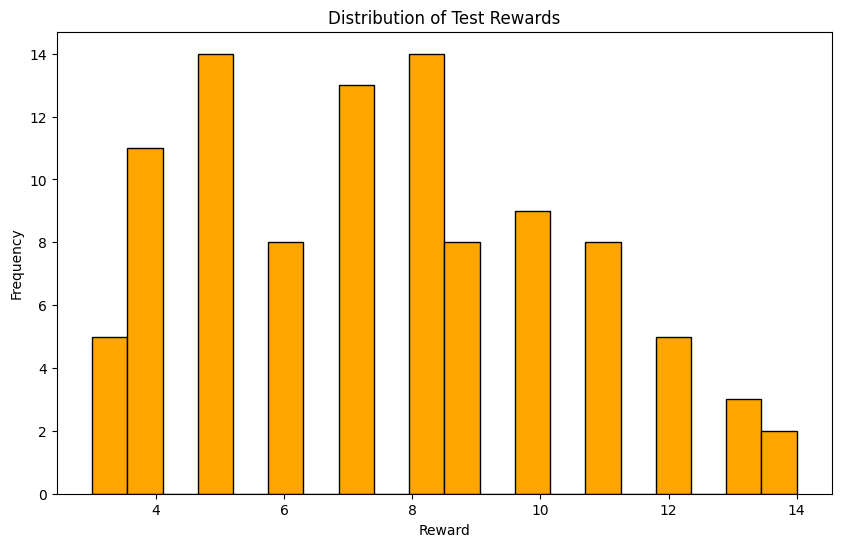

In [52]:
plt.figure(figsize=(10,6))
plt.hist(test_rewards, bins=20, color='orange', edgecolor='black')
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.title("Distribution of Test Rewards")
plt.show()


In [53]:
import imageio
def sampler(q_table):
  terminated , truncated = False , False
  state = env.reset()[0]
  total_reward = 0

  while not (terminated or truncated):
    action = q_table[state].argmax( -1)
    new_s , r , terminated , truncated , info  = env.step(action)
    state = new_s
    total_reward += r
    frames.append(env.render()) # Stores  frames

    env.render()# Displays in the Console
  return total_reward





In [54]:
frames = [] # for frames collection of the render
total_rwrs = sampler(q_table)
imageio.mimsave("taxi_agent.gif", frames, fps=1)

In [55]:
with imageio.get_writer("taxi_agent.mp4", fps=1, codec="libx264") as writer:# Creates and saves the video of the agent interacting with the environment
    for frame in frames:
        writer.append_data(frame)


In [56]:
imageio.mimsave("taxi_agent.gif", frames, duration=0.02)
# 0.02s per frame ≈ 50 fps → 201 frames ≈ 4 seconds


In [59]:
import imageio

def run_episode(q_table, env):
    frames = []
    state, _ = env.reset()
    terminated, truncated = False, False

    while not (terminated or truncated):
        action = q_table[state].argmax()
        state, reward, terminated, truncated, info = env.step(action)

        # Collect frame at each step
        frames.append(env.render())

    return frames

# Run one episode and capture frames
frames = run_episode(q_table, env)

# Save as MP4
with imageio.get_writer("taxi_agent.mp4", fps=3, codec="libx264") as writer:
    for frame in frames:
        writer.append_data(frame)
print('Agent Interaction saved in taxi_agent.mp4 successfully !!!')

Agent Interaction saved in taxi_agent.mp4 successfully !!!


In [58]:
total_reward_per_episode

[10,
 9,
 8,
 -2,
 -15,
 10,
 4,
 3,
 0,
 -1,
 -1,
 5,
 -3,
 3,
 -5,
 -2,
 6,
 5,
 -2,
 8,
 5,
 10,
 -3,
 -9,
 4,
 5,
 8,
 3,
 9,
 11,
 8,
 7,
 10,
 5,
 5,
 -13,
 -4,
 10,
 -5,
 8,
 14,
 8,
 7,
 3,
 5,
 9,
 -16,
 5,
 9,
 -16,
 -4,
 8,
 15,
 7,
 4,
 2,
 11,
 5,
 11,
 1,
 11,
 -5,
 9,
 7,
 9,
 4,
 8,
 9,
 10,
 8,
 9,
 5,
 5,
 9,
 6,
 8,
 1,
 11,
 1,
 -5,
 -6,
 -4,
 -6,
 6,
 9,
 11,
 10,
 8,
 9,
 11,
 9,
 9,
 12,
 4,
 6,
 4,
 -2,
 10,
 7,
 8,
 -6,
 2,
 1,
 6,
 12,
 7,
 7,
 11,
 2,
 14,
 6,
 -3,
 2,
 10,
 9,
 10,
 8,
 -2,
 6,
 -4,
 -14,
 11,
 7,
 9,
 -1,
 10,
 9,
 8,
 5,
 0,
 7,
 7,
 10,
 7,
 7,
 7,
 -6,
 5,
 3,
 11,
 15,
 9,
 9,
 9,
 4,
 7,
 7,
 6,
 2,
 8,
 4,
 -19,
 9,
 -4,
 7,
 8,
 14,
 10,
 8,
 13,
 4,
 9,
 11,
 -1,
 6,
 6,
 -11,
 10,
 6,
 9,
 9,
 11,
 10,
 14,
 8,
 5,
 6,
 -1,
 10,
 5,
 6,
 3,
 10,
 -1,
 9,
 7,
 4,
 11,
 10,
 -5,
 8,
 8,
 7,
 6,
 5,
 6,
 12,
 5,
 5,
 4,
 11,
 11,
 8,
 7,
 13,
 4,
 -5,
 4,
 9,
 5,
 10,
 10,
 -1,
 5,
 2,
 8,
 -4,
 7,
 11,
 7,
 9,
 11,
 8,
 5,
 3,
 12,
 